In [1]:
%pip install open3d

Note: you may need to restart the kernel to use updated packages.


In [2]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import cv2

# monkey patches visualization and provides helpers to load geometries
# sys.path.append('Open3D-master/examples/python/')
# import open3d_tutorial as o3dtut
# change to True if you want to interact with the visualization windows
# o3dtut.interactive = not "CI" in os.environ

In [3]:
# Load in color and depth image to create the point cloud
print("Read dataset")
color_raw = o3d.io.read_image("images/sample_image.png")
depth_raw = o3d.io.read_image("images/sample_image_depth.PNG")
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(color_raw, depth_raw)
print(rgbd_image)

Read dataset
RGBDImage of size 
Color image : 1362x909, with 1 channels.
Depth image : 1362x909, with 1 channels.
Use numpy.asarray to access buffer data.


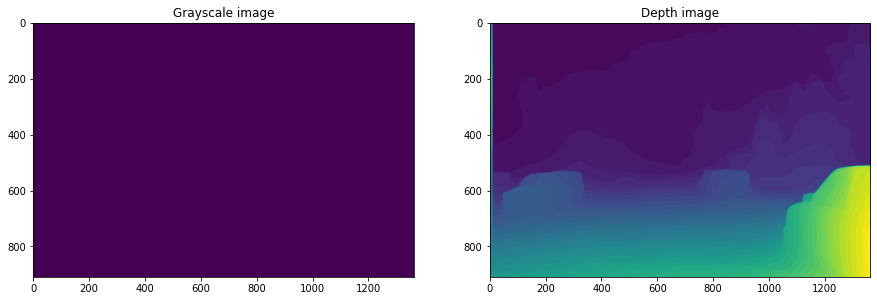

In [4]:
# Plot the images
plt.figure(figsize = (15,5))
plt.subplot(1, 2, 1)
plt.title('Grayscale image')
plt.imshow(rgbd_image.color)
plt.subplot(1, 2, 2)
plt.title('Depth image')
plt.imshow(rgbd_image.depth)
plt.show()

In [5]:
# camera matrix parameters:
# focal length fx, fy and optical centers cx, cy.
# camera_matrix = [[f_x, 0, c_x],
#                 [0, f_y, c_y],
#                 [0, 0,   1  ]]

f_x= 926.9796142578125
f_y= 924.431884765625
c_x= 790.234375
c_y= 617.5499267578125

In [6]:
print(f_x)

926.9796142578125


In [7]:
# Set the intrinsic camera parameters
camera_intrinsic_o3d = o3d.camera.PinholeCameraIntrinsic(width=1362, height=909, fx=f_x,fy=f_y, cx=c_x, cy=c_y)
print(camera_intrinsic_o3d.intrinsic_matrix)

[[926.97961426   0.         790.234375  ]
 [  0.         924.43188477 617.54992676]
 [  0.           0.           1.        ]]


In [ ]:
# Create the point cloud from images and camera intrisic parameters
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd_image, camera_intrinsic_o3d)
    
# Flip it, otherwise the pointcloud will be upside down
pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
o3d.visualization.draw_geometries([pcd])#, zoom=0.5)

In [ ]:
# # Load in the point cloud created from OpenCV to compared to Open3D
# opencv_pcd_path = "C:/Users/nhoei/ComputerVision/monocularDepth/reconstructedMono.ply"
# pcd = o3d.io.read_point_cloud(opencv_pcd_path)

# # Flip it, otherwise the pointcloud will be upside down
# pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
# o3d.visualization.draw_geometries([pcd], zoom=0.5)

In [ ]:
xyz = np.asarray(pcd.points)
print(xyz[0])

In [ ]:
print(xyz)

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(xyz[:,0],xyz[:,2])